# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></div><div class="lev1 toc-item"><a href="#Getting-Started" data-toc-modified-id="Getting-Started-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Getting Started</a></div><div class="lev2 toc-item"><a href="#Initialization" data-toc-modified-id="Initialization-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Initialization</a></div><div class="lev3 toc-item"><a href="#rpy2-and-rmagic" data-toc-modified-id="rpy2-and-rmagic-211"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>rpy2 and rmagic</a></div><div class="lev2 toc-item"><a href="#Data-input-/-output" data-toc-modified-id="Data-input-/-output-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data input / output</a></div><div class="lev2 toc-item"><a href="#Graph-plotting" data-toc-modified-id="Graph-plotting-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Graph plotting</a></div><div class="lev2 toc-item"><a href="#Example:-Naive-Bayes" data-toc-modified-id="Example:-Naive-Bayes-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Example: Naive Bayes</a></div><div class="lev3 toc-item"><a href="#QFog-NaiveBayesLner" data-toc-modified-id="QFog-NaiveBayesLner-241"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>QFog NaiveBayesLner</a></div><div class="lev3 toc-item"><a href="#bnlearn-naive.bayes" data-toc-modified-id="bnlearn-naive.bayes-242"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>bnlearn naive.bayes</a></div><div class="lev3 toc-item"><a href="#Timing" data-toc-modified-id="Timing-243"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Timing</a></div><div class="lev1 toc-item"><a href="#Appendix" data-toc-modified-id="Appendix-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Appendix</a></div><div class="lev2 toc-item"><a href="#Use-R-in-jupyter-with-Python-kernel" data-toc-modified-id="Use-R-in-jupyter-with-Python-kernel-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Use R in jupyter with Python kernel</a></div><div class="lev3 toc-item"><a href="#Introduction:" data-toc-modified-id="Introduction:-311"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Introduction:</a></div><div class="lev3 toc-item"><a href="#Installation:" data-toc-modified-id="Installation:-312"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Installation:</a></div><div class="lev3 toc-item"><a href="#For-linux:" data-toc-modified-id="For-linux:-313"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>For linux:</a></div><div class="lev2 toc-item"><a href="#The-&quot;Testing&quot;-example-from-bnlearn" data-toc-modified-id="The-&quot;Testing&quot;-example-from-bnlearn-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>The "Testing" example from bnlearn</a></div><div class="lev2 toc-item"><a href="#examples" data-toc-modified-id="examples-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>examples</a></div><div class="lev3 toc-item"><a href="#Another-example:" data-toc-modified-id="Another-example:-331"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Another example:</a></div><div class="lev3 toc-item"><a href="#Console-writing-issue" data-toc-modified-id="Console-writing-issue-332"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Console-writing issue</a></div>

# Introduction

This notebook is an introduction for the learning part of QuantumFog package on GitHub: [Quantum Fog](https://github.com/artiste-qb-net/quantum-fog)

It contains some simple tutorials and examples for learning Bayesian Network in QuantumFog with different algorithms. 

It also contains the performance comparisons between QuantmFog and "bnlearn" package for the same data/networks.  More detail of R package "bnlearn" by Marco Scutari can be found at [bnlearn](http://www.bnlearn.com/)

This notebook is organized as below:
* Tutorial for how to initialize the package. How to import, use, input/output data and networks. 

* Structure learning
    * The structures of learned networks by different algorithms
    * The comparison of learned structures between QFog and bnlearn.
    * The time used by different algorithms
   
* Parameters learning (To-Do)
    * From the same networks, the structures are imported.
    * From the same data sets, the structures are learned from data. 

# Getting Started

##  Initialization
Importing; Adding system path; 

In order to use "graphviz" to define and render graphs, one need to install both graphviz python module and graphviz program. 

In [1]:
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
from graphviz import Digraph, Source

from learning.NaiveBayesLner import *
from learning.MB_GrowShrinkLner import *
from learning.MB_IAMB_Lner import *
from learning.HillClimbingLner import *

###  rpy2 and rmagic

In order to run R-codes and exchange data between Python and R, we use rpy2 module and rmagic codes in Jupyter notebook.

Unlike for Linux-based system, the installation of rpy2 for Windows is quite annoying (cheers for Microsoft!). Check the Appendix for more details about how to intall/use rpy2 under Windows OS.

Of course, one also need to install the required R packages like "bnlearn" and "Rgraphviz" in your R program.  

In [2]:
import rpy2
%load_ext rpy2.ipython
%R library("bnlearn");
%R library("Rgraphviz");

## Data input / output

Setup file paths:
* path_??? -> the input data/network path
* test_???  -> the temporary test data/network path, in order to avoid overwrite the original files. 

In [3]:
path_csv = '../learning/training_data_c/earthquake.csv'
path_bif = '../examples_cbnets/earthquake.bif'
path_dot = '../examples_cbnets/earthquake.dot'
test_csv = 'test.csv'
test_dot = 'test.dot'

1. Import data from CSV file to pandas.DataFrame
2. Read out the nodes name from 'states_df' 

In [4]:
states_df = pd.read_csv(path_csv)
for item in states_df.columns.values:
    print(item)
# show the first 5 rows
states_df.head()

Earthquake
Burglary
Alarm
JohnCalls
MaryCalls


,Earthquake,Burglary,Alarm,JohnCalls,MaryCalls
0,1,1,1,1,1
1,1,1,1,1,1
2,1,1,1,1,1
3,1,1,1,1,1
4,1,1,1,1,1


1. exchange 'states_df' data between Python and R; this can be done by "%Rpush" and "%Rpull"
2. Show this data structure by "str()" function in R
3. The output will be shown in jupyter console; to avoid this, use "capture.output()" in R, and print the output in python

In [5]:
%Rpush states_df
out = %R capture.output(str(states_df))
print(out)

["'data.frame':\t5000 obs. of  5 variables:"
 ' $ Earthquake: int  1 1 1 1 1 1 1 1 1 1 ...'
 ' $ Burglary  : int  1 1 1 1 1 1 1 1 1 1 ...'
 ' $ Alarm     : int  1 1 1 1 1 1 1 1 1 1 ...'
 ' $ JohnCalls : int  1 1 1 1 1 1 1 1 1 1 ...'
 ' $ MaryCalls : int  1 1 1 1 1 1 1 1 1 1 ...']


one can also directly read data from .csv file, and compare with previous 'states_df'

In [6]:
%Rpush path_csv
%R states_df1 = read.csv(file = path_csv, header=TRUE, sep=",")
out1 = %R capture.output(str(states_df1))
print(out1)

["'data.frame':\t5000 obs. of  5 variables:"
 ' $ Earthquake: int  1 1 1 1 1 1 1 1 1 1 ...'
 ' $ Burglary  : int  1 1 1 1 1 1 1 1 1 1 ...'
 ' $ Alarm     : int  1 1 1 1 1 1 1 1 1 1 ...'
 ' $ JohnCalls : int  1 1 1 1 1 1 1 1 1 1 ...'
 ' $ MaryCalls : int  1 1 1 1 1 1 1 1 1 1 ...']


as well as write data to .csv file with R codes

In [7]:
%R write.csv(states_df, file = 'test.csv', quote = FALSE, row.names = FALSE )
%R states_df2 = read.csv(file='test.csv', header=TRUE, sep=",")
out2 = %R capture.output(str(states_df2))
print(out2)

["'data.frame':\t5000 obs. of  5 variables:"
 ' $ Earthquake: int  1 1 1 1 1 1 1 1 1 1 ...'
 ' $ Burglary  : int  1 1 1 1 1 1 1 1 1 1 ...'
 ' $ Alarm     : int  1 1 1 1 1 1 1 1 1 1 ...'
 ' $ JohnCalls : int  1 1 1 1 1 1 1 1 1 1 ...'
 ' $ MaryCalls : int  1 1 1 1 1 1 1 1 1 1 ...']


## Graph plotting

Read graph from .bif or .dot file, and plot them use only standard Python libraries like matplotlib. 

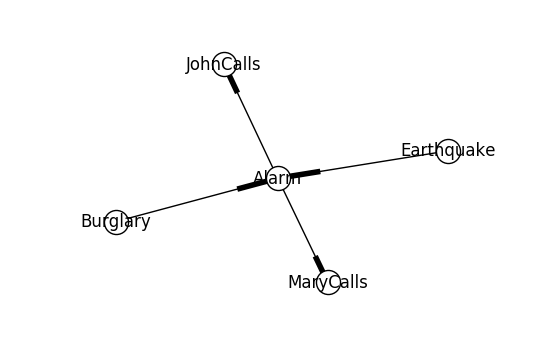

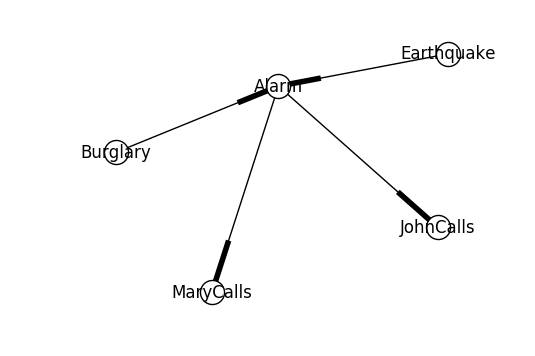

In [8]:
bnet1 = BayesNet.read_bif(path_bif, is_quantum=False)
bnet2 = BayesNet.read_dot(path_dot)
bnet1.draw(algo_num=2)
bnet2.draw(algo_num=2)

In order to have better output for large graphs, one can also save and render the .dot source code by 'graphviz'. 
1. From .dot file:  use Source() to create a Source object holding your DOT string:
2. with render() method save and render the graph with the default layout. also automatically open the resulting (PDF, PNG, SVG, etc.) file with system’s default viewer application for the file type.

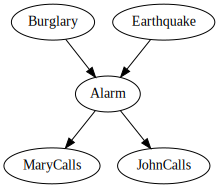

In [9]:
#Source(open(path_dot).read()).render(view=True) #  automatically opening
Source(open(path_dot).read())

On the other hand, From Bayesian Networks: use the write_dot() method to generate a .dot file, then follow the method above.

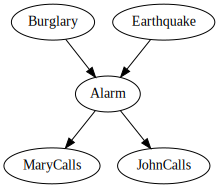

In [10]:
# From BNet:
bnet1.write_dot(test_dot)
Source(open(test_dot).read())

## Example: Naive Bayes

In this section, we use Naive Bayes method as example to show the use of QuantumFog and bnlearn.

Naive Bayes: Bayesian Network classification; The simple algorithm assuming that all classifiers are independent. So that $$p(x|C_j) \propto \prod_{k=1}^{d}p(x_{k}|C_{j}). $$ Although "naive", this model is often sufficiently good for
    classification purposes.

### QFog NaiveBayesLner
Use QFog NaiveBayesLner, and set target node as "Burglary", so that 'Earthquake' is caused by 'Burglary':)

In [11]:
path_csv = '../learning/training_data_c/earthquake.csv'
%Rpush path_csv
test_dot = 'test.dot'
states_df = pd.read_csv(path_csv, dtype = str)
for item in states_df.columns.values:
    print(item)

Earthquake
Burglary
Alarm
JohnCalls
MaryCalls


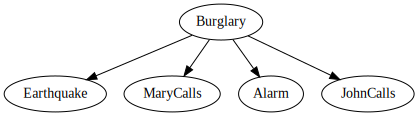

In [12]:
lnr = NaiveBayesLner(states_df, 'Burglary')
lnr.bnet.write_dot(test_dot)
Source(open(test_dot).read())

### bnlearn naive.bayes
Use bnlearn naive.bayes package, and set target node as "Burglary" again.

read data from .csv file

In [13]:
%R states_df <- read.csv(file=path_csv, header=TRUE, sep=",")
# out = %R capture.output(str(states_df))
print(out)
%R bn.naive <- naive.bayes(states_df, 'Burglary');

["'data.frame':\t5000 obs. of  5 variables:"
 ' $ Earthquake: int  1 1 1 1 1 1 1 1 1 1 ...'
 ' $ Burglary  : int  1 1 1 1 1 1 1 1 1 1 ...'
 ' $ Alarm     : int  1 1 1 1 1 1 1 1 1 1 ...'
 ' $ JohnCalls : int  1 1 1 1 1 1 1 1 1 1 ...'
 ' $ MaryCalls : int  1 1 1 1 1 1 1 1 1 1 ...']

Error in data.type(x) : 
  variable Earthquake is not supported in bnlearn (type: integer).


bnlearn can't work with mixed variables with integer. So the above codes return an error.

If the data file contains boolean like 0/1, or integers like 1,2,3, one should use: colClasses = "factor" to force data to factors.

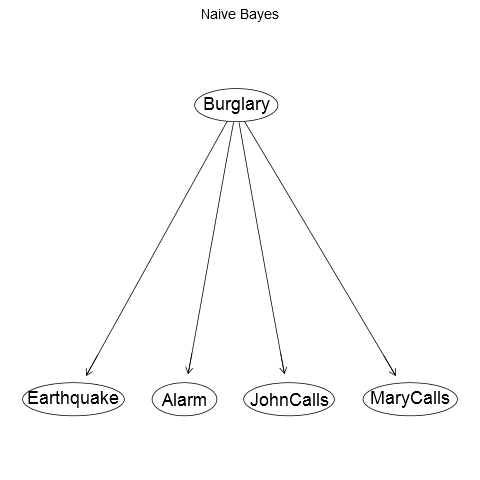

In [14]:
%%R
states_df <- read.csv(file=path_csv, header=TRUE, sep=",", colClasses = "factor")
bn.naive <- naive.bayes(states_df, 'Burglary');
graphviz.plot(bn.naive, shape = "ellipse", main = "Naive Bayes")

### Timing

Check how long the learning process takes (averaged over 20 runs).

In [15]:
%timeit -n 20 lnr = NaiveBayesLner(states_df, 'Burglary')

20 loops, best of 3: 1.67 ms per loop


Thought it's unfair to compare the time between Python codes and R codes within a Python kernel, on can out put the running time any way:

In [16]:
%timeit -n 10 %R bn.naive <- naive.bayes(learning.test, 'D')

10 loops, best of 3: 7.06 ms per loop


# Appendix

## Use R in jupyter with Python kernel

To show how to use rpy2 and rmagic.

### Introduction: 

using R magic commands within Python Jupyter notebooks using rpy2 module.
show how to load rpy2 within a notebook and then pass variables from python to R and back

See some introductions: 

[Pipelining R and Python in Notebooks, By Joseph Rickert](https://www.r-bloggers.com/pipelining-r-and-python-in-notebooks/)

[Jupyter+Python+R with rpy2 and magics, by michhar](https://github.com/michhar/rpy2_sample_notebooks)

[IPython, IPython Notebook, Anaconda, and R (rpy2), by Becky](http://www.swegler.com/becky/blog/2014/08/03/ipython-ipython-notebook-anaconda-and-r-rpy2/)

[Rmagic Functions Extension, on nbviewer](http://nbviewer.ipython.org/github/ipython/ipython/blob/3607712653c66d63e0d7f13f073bde8c0f209ba8/docs/examples/notebooks/rmagic_extension.ipynb)

### Installation:  


1. Install R
2. Add R executables to system PATH: for 64-bit:

    1. Change Path for R computer-> property -> advanced and system setting -> environment variables
    2. user variable PATH add C:\Program Files\R\R-3.3.2\bin\x64;
    3. system variable field add two new variables:
        1. R_HOME  C:\program files\R\R-3.3.2
        2. R_USER  C:\Program Files\RStudio\bin;C:\Users\"xxx"\Anaconda3\Lib\site-packages\rpy2
    
    4. Otherwise you get RuntimeError: R_HOME not defined. error when you try to import rpy2. (thanks to R_HOME Error with rpy2)

3. Install rpy2:

    1. pip install rpy2

            some time it not works...

    2. Instead

        1. go to: http://www.lfd.uci.edu/~gohlke/pythonlibs/#rpy2,
        2. download the suiting whl file for your configuration.
        3. Then go to your download folder in cmd and simply use: pip install rpy2-2.7.8-cp27-none-win32.whl

    3. use latest version:

        * rpy2 2.8.x for python 3.5; otherwise get an error;

4. Install R packages:

    1. install.packages("PACKAGE NAME")
    2. ggplot2 package: install.packages("ggplot2")
    3. Rgraphviz package: from the bioconductors site.
        source("http://bioconductor.org/biocLite.R")
        biocLite("Rgraphviz")

### For linux:

On the other hand, for linux: 
1. Install R:
        sudo apt-get install r-base r-base-core r-base-html

2. Install rpy2:
        pip install rpy2

Cheers for Windos !!!

## The "Testing" example from bnlearn 

In [17]:
%%R 
data(learning.test)
str(learning.test)
bn.gs <- gs(learning.test)
bn.hc <- hc(learning.test, score = 'aic')

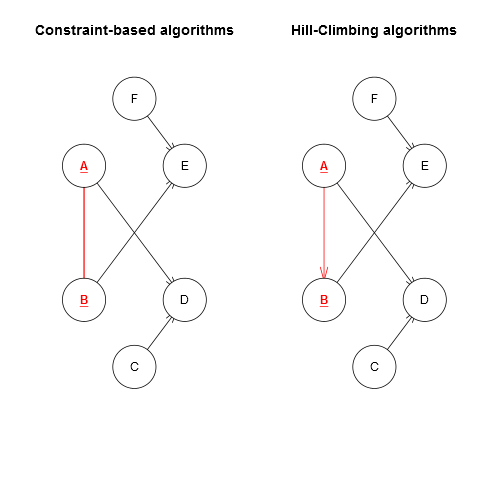

In [18]:
%%R
par(mfrow = c(1,2))
plot(bn.gs, main = "Constraint-based algorithms", highlight = c("A", "B"))
plot(bn.hc, main = "Hill-Climbing algorithms", highlight = c("A", "B"))

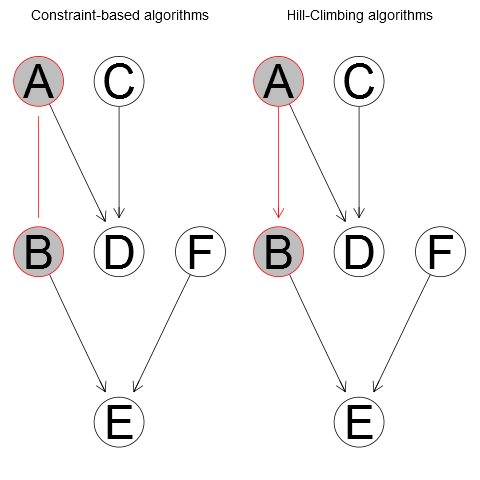

In [19]:
%%R
library("Rgraphviz")
par(mfrow = c(1,2))
highlight.opts <- list(nodes = c("A", "B"), arcs = c("A", "B"), col = "red", fill = "gray")
graphviz.plot(bn.gs, main = "Constraint-based algorithms", highlight = highlight.opts)
graphviz.plot(bn.hc, main = "Hill-Climbing algorithms", highlight = highlight.opts)


## examples 

from github:
https://github.com/michhar/rpy2_sample_notebooks 

loading the R ipython extension, creating a python pandas dataframe, passing this as input to R, and graphing the data with R's ggplot2 package.

In [20]:
df = pd.DataFrame({'Letter': ['a', 'a', 'a', 'b','b', 'b', 'c', 'c','c'],
                   'X': [4, 3, 5, 2, 1, 7, 7, 5, 9],
                   'Y': [0, 4, 3, 6, 7, 10, 11, 9, 13],
                   'Z': [1, 2, 3, 1, 2, 3, 1, 2, 3]})

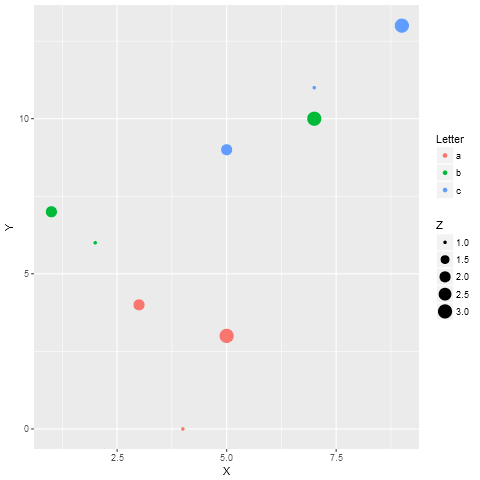

In [21]:
%%R -i df
require("ggplot2")
ggplot(data = df) + geom_point(aes(x = X, y = Y, color = Letter, size = Z))

### Another example: 
creating some data in python with numpy, passing this as input to R, performing a linear fit, graphing the results with R's plot, and passing the results of the fit (the coefficients) back to python for printing.

In [22]:
import numpy as np
x = np.array([1, 2, 4, 6, 5, 8])
y = np.array([0, 1, 3, 2, 5, 7])

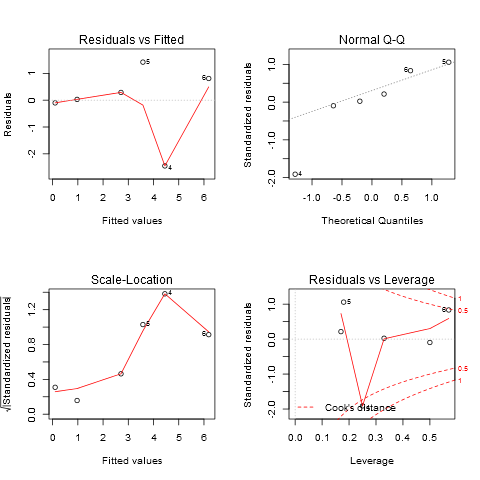

In [23]:
%%R -i x,y -o mycoef
xylm = lm(y~x)
mycoef = coef(xylm)
par(mfrow = c(2, 2))
plot(xylm)

In [24]:
%%R 
print(summary(xylm))
ls(xylm)
residuals(xylm)

In [25]:
%%R
print(summary(xylm))
ls(xylm)
residuals(xylm)

### Console-writing issue

why the above codes have no output? 

>if you are trying to get the latest rpy2 working on the latest Jupyter notebook on Windows, just be warned you might run into a console-writing issue. That is, print statements might write to the terminal instead of the notebook browser window.

#### Use  "capture.output()"  in R

In [26]:
a = %R print(summary(xylm))
print(a)
a = %R residuals(xylm)
print(a)



Call:

lm(formula = y ~ x)



Residuals:

    1     2     3     4     5     6 

-0.10  0.03  0.29 -2.45  1.42  0.81 



Coefficients:

            Estimate Std. Error t value Pr(>|t|)  

(Intercept)  -0.7700     1.2651  -0.609   0.5756  

x             0.8700     0.2565   3.392   0.0275 *

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



Residual standard error: 1.481 on 4 degrees of freedom

Multiple R-squared:  0.7421,	Adjusted R-squared:  0.6776 

F-statistic: 11.51 on 1 and 4 DF,  p-value: 0.02747



[-0.1   0.03  0.29 -2.45  1.42  0.81]
